# One-class SVM - novelty detection
- `One-class SVM (svm_outlier_detection)`은 novelty detection을 위한 결정 기능을 학습하는 비지도 학습 알고리즘  

- 새로운 데이터를 훈련 세트와 유사하거나 다른 것으로 분류  

One-class SVM은 이상 또는 이상치 감지를 위한 비지도 모델입니다. 일반 지도학습 SVM과 달리 One-class SVM에는 모델 교육 프로세스에 대한 target label이 없습니다. 대신 normal 데이터 포인트에 대한 boundary를 학습하고 boundary 외부의 데이터를 비정상으로 식별합니다.  

다음을 학습 합니다.

- One-class SVM 모델을 훈련하는 방법
- One-class SVM 모델에서 이상을 예측하는 방법  
- 이상 예측에 대한 기본 임계값을 변경하는 방법
- 예측 결과를 시각화하는 방법

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

### Train Data 생성

In [8]:
np.random.seed(42)

# Generate train data
X = 0.3 * np.random.randn(100, 2)
X.shape

(100, 2)

In [7]:
X_train = np.vstack([X + 2, X - 2])
X_train.shape

(200, 2)

### Test Data 생성 
- Train Data 와 같은 mechanism + 다른 mechanism

In [9]:
# Generate some regular novel observations 
X = 0.3 * np.random.randn(20, 2)
X_test = np.vstack([X + 2, X - 2])
X_test.shape

(40, 2)

In [10]:
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X_outliers.shape

(20, 2)

### One-class SVM 모델 훈련 

- kernel function    
- SVM은 초평면(hyper-plane)이라는 개념을 사용하여 데이터를 분류  
- kernel function을 이용한 차원 변경 trick 사용  

- nu=0.01은 데이터 세트에 약 1%의 이상치가 있음을 의미  

- Return 값 : -1 - outliers,  1 - inliers.

In [11]:
# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)

OneClassSVM(gamma=0.1, nu=0.1)

### Anomaly 예측 

In [12]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [25]:
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

print("train data에 대한 오분류 비율 :" , n_error_train / len(X_train))
print("test data에 대한 오분류 비율 :" , n_error_test / len(X_test))
print("이상치 data에 대한 오분류 비율 :" , n_error_outliers / len(X_outliers))

train data에 대한 오분류 비율 : 0.105
test data에 대한 오분류 비율 : 0.175
이상치 data에 대한 오분류 비율 : 0.0


In [ ]:
# model 성능 check
print("accuracy =", accuracy_score(y_test, y_pred))
print("recall =", recall_score(y_test, y_pred))

### 시각화를 통한 original data와 anomaly 예측 결과 비교

- 등고선 plot을 이용하여 train, test data, outlier data 가 분리 초평면(separating hyperplane )에서 얼마나 떨어져 있는지 표시  
- decision_function(X) : 분리 초평면과의 거리 반환 


In [36]:
# plot the line, the points, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
print(xx.shape, yy.shape)

Z = clf.decision_function(np.column_stack([xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
Z.shape

(500, 500) (500, 500)


(500, 500)

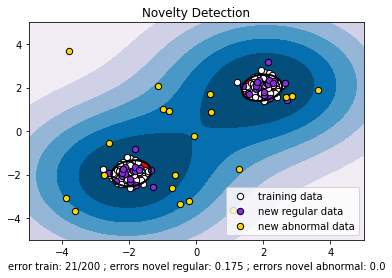

In [57]:
plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="red")

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k", label="training data")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k", label="new regular data")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k", label="new abnormal data")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(loc=4)
plt.xlabel(
    f"error train: {n_error_train}/{len(X_train)} ; errors novel regular: {n_error_test/len(X_test)} ; errors novel abnormal: {n_error_outliers/len(X_outliers)}"
)
plt.show()

### 참고 - meshgrid 이해
- numpy 를 이용하여 2차원 격자 만들기
<img src="https://blog.kakaocdn.net/dn/BPOMh/btq5gFDL6j9/3TrmTm06aImuMaDBPbkBgK/img.png" width=400/>

In [64]:
xx, yy = np.meshgrid(np.linspace(1, 10, 10), np.linspace(11, 20, 10))
print(xx.shape, yy.shape)

(10, 10) (10, 10)


In [66]:
xx, yy

(array([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]]),
 array([[11., 11., 11., 11., 11., 11., 11., 11., 11., 11.],
        [12., 12., 12., 12., 12., 12., 12., 12., 12., 12.],
        [13., 13., 13., 13., 13., 13., 13., 13., 13., 13.],
        [14., 14., 14., 14., 14., 14., 14., 14., 14., 14.],
        [15., 15., 15., 15., 15., 15., 15., 15., 15., 15.],
        [16., 16., 16., 16., 16., 16., 16., 16., 16., 16.],
        [17., 17., 17., 17., 17., 17.,

In [67]:
np.column_stack([xx.ravel(), yy.ravel()])

array([[ 1., 11.],
       [ 2., 11.],
       [ 3., 11.],
       [ 4., 11.],
       [ 5., 11.],
       [ 6., 11.],
       [ 7., 11.],
       [ 8., 11.],
       [ 9., 11.],
       [10., 11.],
       [ 1., 12.],
       [ 2., 12.],
       [ 3., 12.],
       [ 4., 12.],
       [ 5., 12.],
       [ 6., 12.],
       [ 7., 12.],
       [ 8., 12.],
       [ 9., 12.],
       [10., 12.],
       [ 1., 13.],
       [ 2., 13.],
       [ 3., 13.],
       [ 4., 13.],
       [ 5., 13.],
       [ 6., 13.],
       [ 7., 13.],
       [ 8., 13.],
       [ 9., 13.],
       [10., 13.],
       [ 1., 14.],
       [ 2., 14.],
       [ 3., 14.],
       [ 4., 14.],
       [ 5., 14.],
       [ 6., 14.],
       [ 7., 14.],
       [ 8., 14.],
       [ 9., 14.],
       [10., 14.],
       [ 1., 15.],
       [ 2., 15.],
       [ 3., 15.],
       [ 4., 15.],
       [ 5., 15.],
       [ 6., 15.],
       [ 7., 15.],
       [ 8., 15.],
       [ 9., 15.],
       [10., 15.],
       [ 1., 16.],
       [ 2., 16.],
       [ 3.,